In [1]:
from station_data import *
from stream_processing import *
from event_detection import *
from catalogued_events import *
from stream_processing import *
import matplotlib.pyplot as plt
from obspy import UTCDateTime
import torch
import sys
from report_generation import *
from email_sending import *

### This Notebook produces contents for report or email notification using previous saved files of data produced.

Initiating Parameters for Report Content Generation

In [2]:
# Set date and station for studying423
date = UTCDateTime("2024-04-23") 
station = ['AM','R50D6','https://data.raspberryshake.org']
station_coordinates = get_coordinates(station)

# Generate a path for all files to be saved to
date_folder = generate_data_path(date, station)
content_path = os.path.join(date_folder, "generated")
os.makedirs(content_path, exist_ok=True)

Reading Saved Files

In [12]:
saved_df_completed = read_csv_from_path(date_folder, date, station, 'completed')
saved_processed_stream = read_stream_from_path(date_folder, date, station, 'processed')
saved_annotated_stream = read_stream_from_path(date_folder, date, station, 'processed.annotated')

Loaded csv from D:\Dissertation\data\AM.R50D6\2024-04-23\2024-04-23.completed.csv
Loaded stream from D:\Dissertation\data\AM.R50D6\2024-04-23\2024-04-23_AM.R50D6..Z.processed.mseed
Loaded stream from D:\Dissertation\data\AM.R50D6\2024-04-23\2024-04-23_AM.R50D6..Z.processed.annotated.mseed


Save Catalogue Globe Plot To File

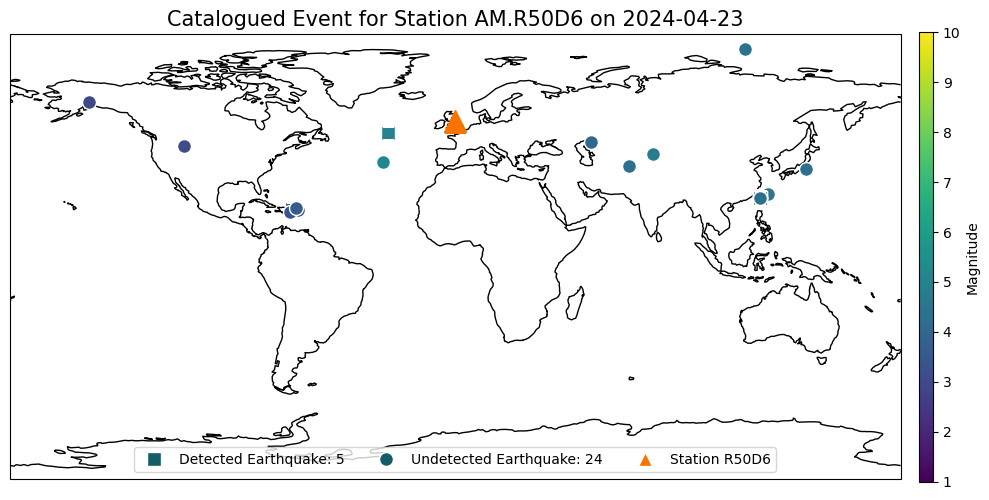

In [13]:
plot_catalogue(saved_df_completed, station,station_coordinates, date, fill_map = False, path=content_path,show=True)

Save Wave+Annotation Plots For Matched Events To File Using Event ID

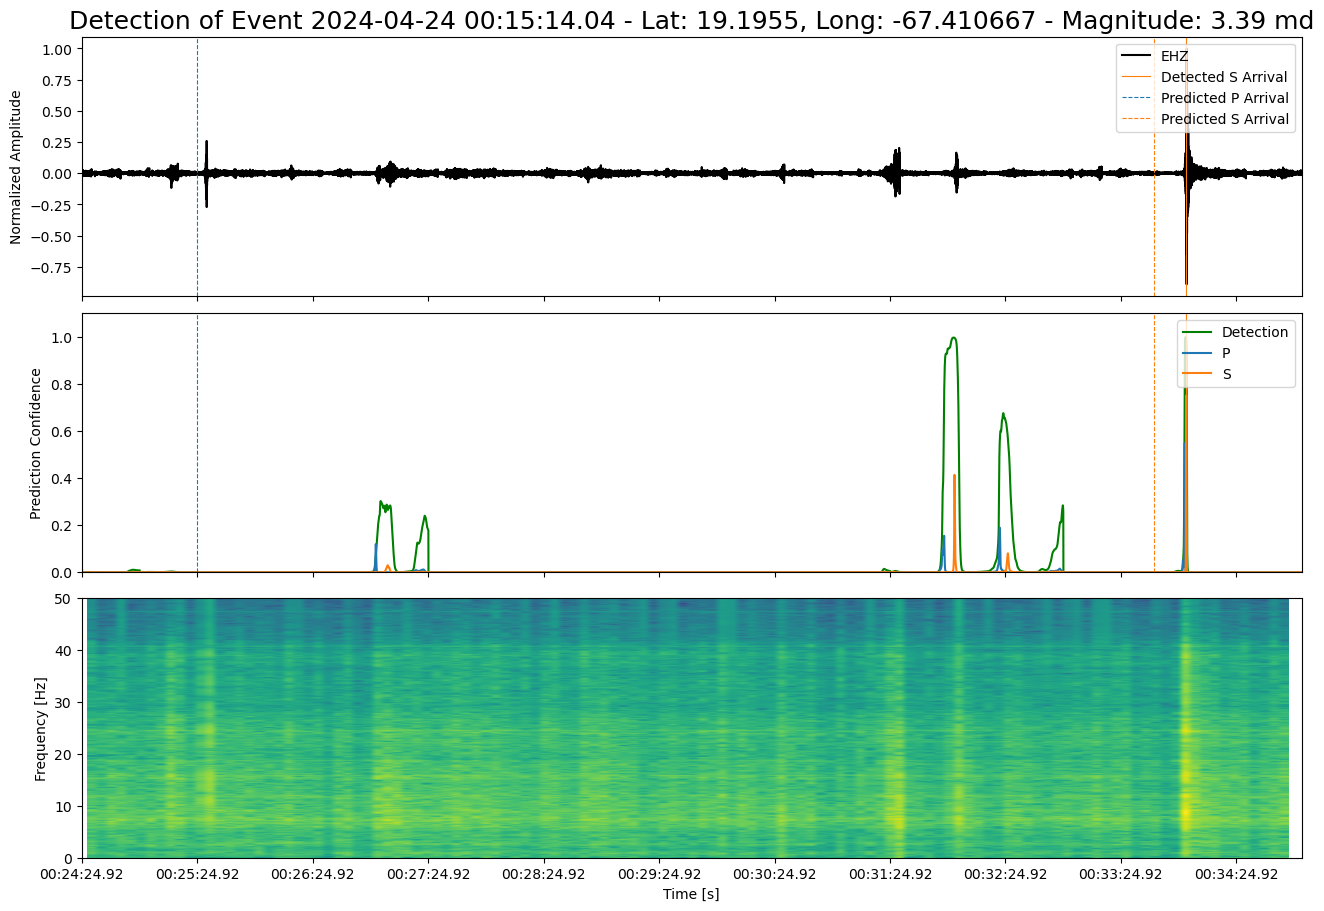

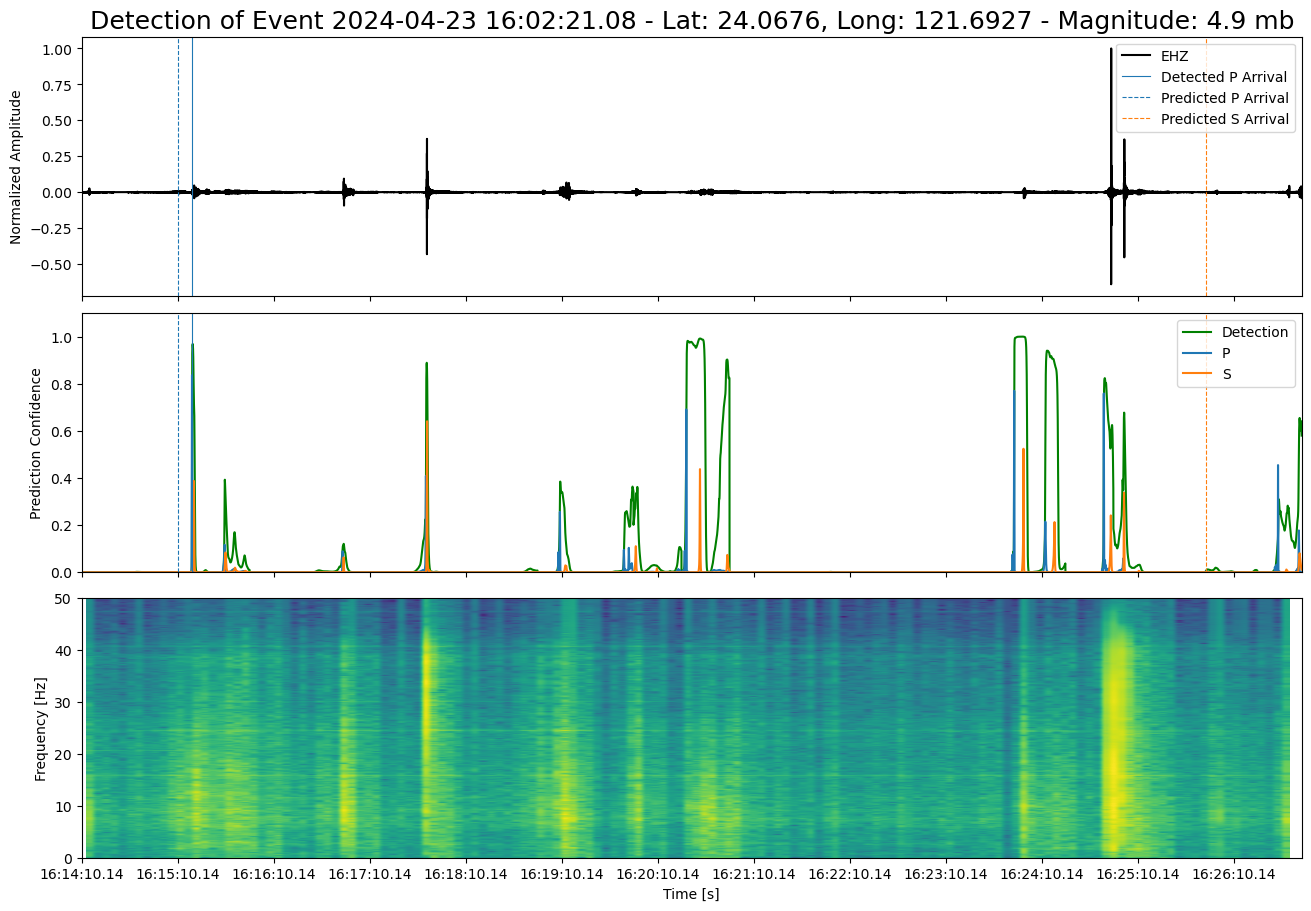

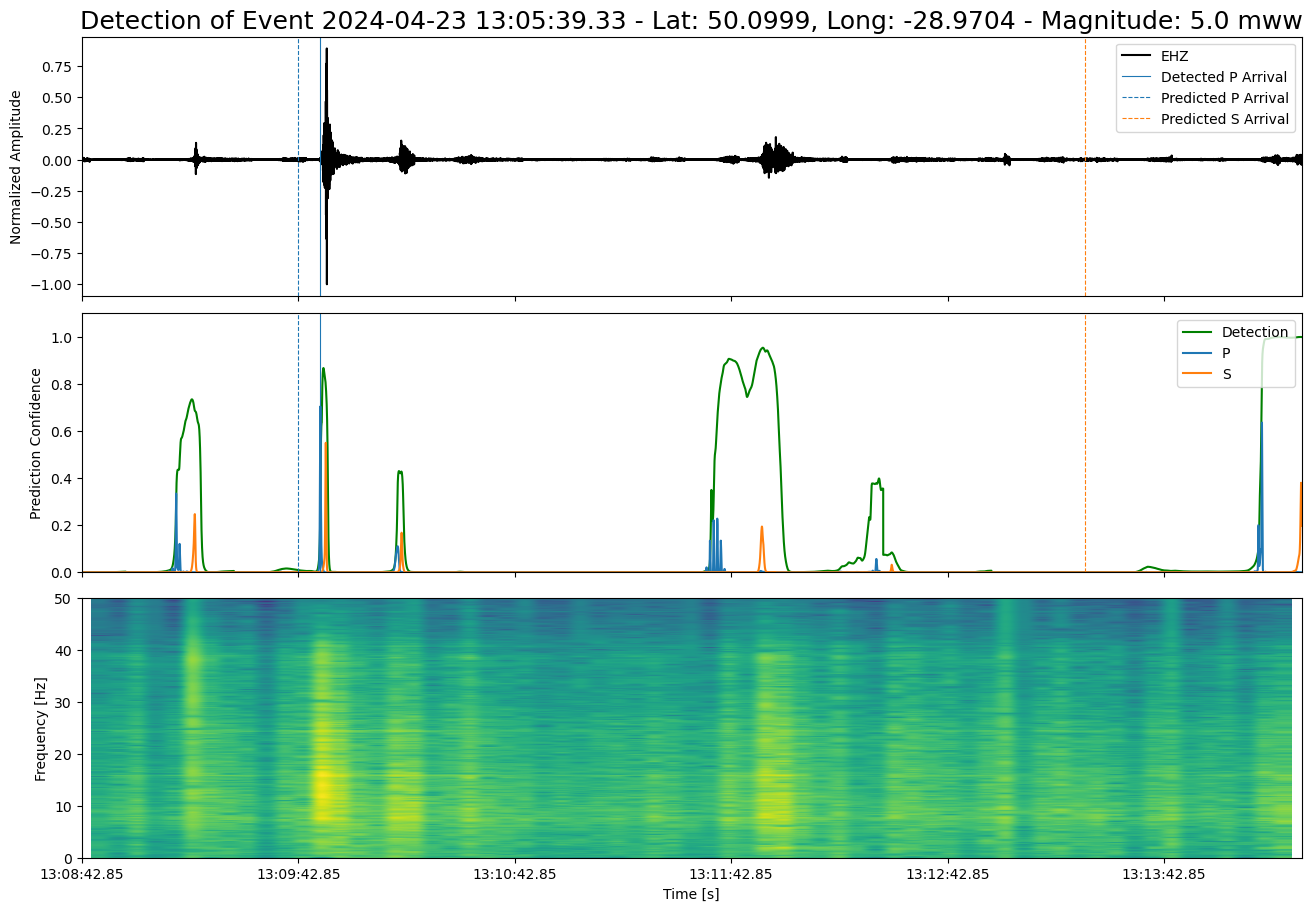

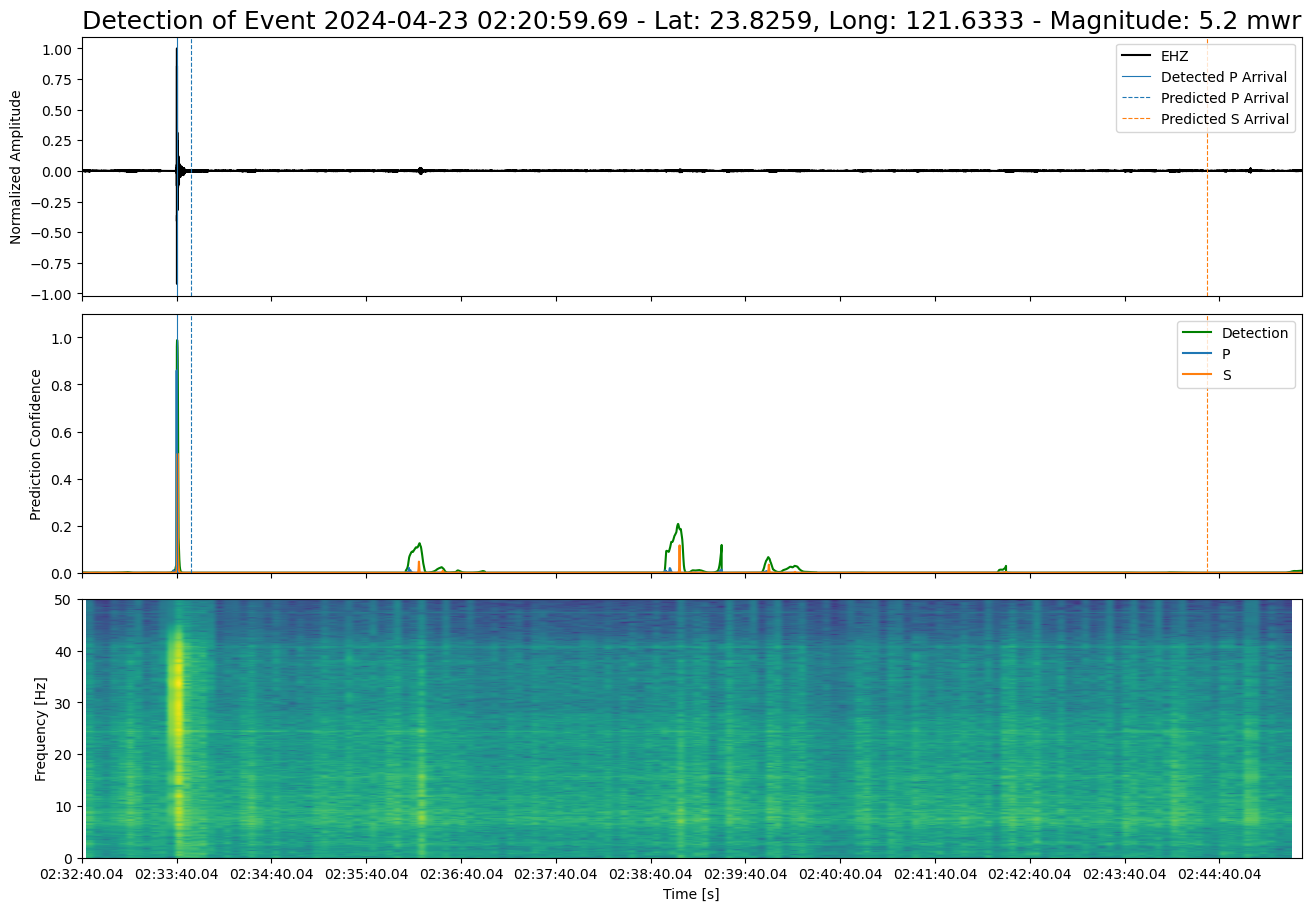

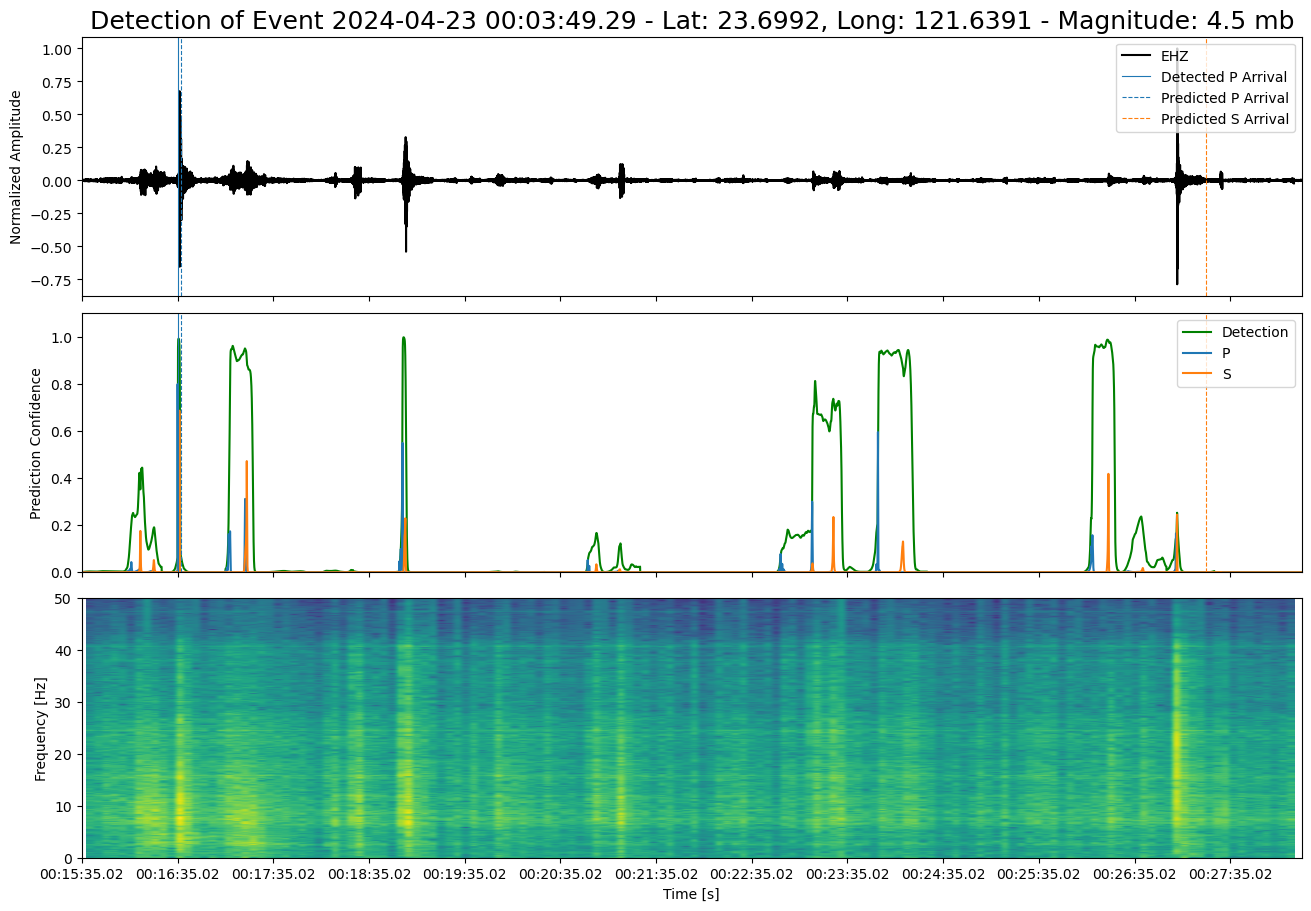

In [14]:
matched_events = saved_df_completed[(saved_df_completed['catalogued'] == True) & (saved_df_completed['detected'] == True)]

for _, row in matched_events.iterrows():
    earthquake_info = get_event_info(row)  
    
    if matched_events.empty:
        continue
    plot_predictions_wave(saved_processed_stream,saved_annotated_stream, earthquake_info, path=content_path,show=True)

In [15]:
for _, row in matched_events.iterrows():
    earthquake_info = get_event_info(row)  
    
    if matched_events.empty:
        continue
    plot_predictions_wave(saved_processed_stream,saved_annotated_stream, earthquake_info, path=content_path,show=False)

Saved plot to D:\Dissertation\data\AM.R50D6\2024-04-23\generated\annotation_11832277.png
Saved plot to D:\Dissertation\data\AM.R50D6\2024-04-23\generated\annotation_11832096.png
Saved plot to D:\Dissertation\data\AM.R50D6\2024-04-23\generated\annotation_11832031.png
Saved plot to D:\Dissertation\data\AM.R50D6\2024-04-23\generated\annotation_11831877.png
Saved plot to D:\Dissertation\data\AM.R50D6\2024-04-23\generated\annotation_11831857.png


Generate HTML Codes For Email

In [17]:
html_code = create_earthquake_report_html(saved_df_completed, content_path, date, station, simplified = True)

HTML report generated: D:\Dissertation\data\AM.R50D6\2024-04-23\generated\2024-04-23_report.html


Prepare The Message With Image Embedded.

In [19]:
processed_html = process_and_update_html(html_code, content_path, date) 

Send The Email

In [20]:
msg = prepare_email(processed_html, date)
# send_email(msg, 'xmpg69@durham.ac.uk')